# Aprendizaje no supervisado

1. Reducción de la dimensionalidad

2. Clustering o agrupamiento

## Reducción de la dimensionalidad

1. Análisis de componentes principales

2. t-SNE


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
X = load_iris()['data']
y = load_iris()['target']

In [ ]:
X = pd.DataFrame(X, columns=load_iris()['feature_names'])

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


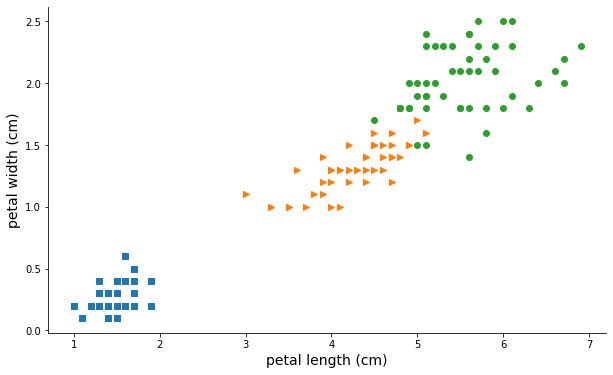

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(10,6))
markers = ['s','>','o']
for i,j in zip(np.unique(y), markers):
  ax.scatter(X.iloc[:,2][y==i], X.iloc[:,3][y==i], marker=j)

ax.set_xlabel(X.columns[2], size=14)
ax.set_ylabel(X.columns[3], size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Análisis de componentes principales (PCA)

Método de reducción de la dimensionalidad a través de una descomposición de la varianza.

1. Estandarizar el dataset
2. Construir la matriz de covarianzas
3. Descomponer la matriz de covarianzas en valores propios y vectores propios.
5. Seleccionar $k$ vectores propios, los cuales corresponden a los $k$ vectores más grandes, donde $k$ representa la dimensionalidad del nuevo dataset.
6. Construir una matriz de proyección $W$, del top de $k$ vectores propios.
7. Transformar el dataset input, $X$, utilizando la matriz de proyección $W$ para obtener el nuevo subespacio $k$-dimensional.

In [ ]:
X = X.to_numpy()

In [ ]:
# estandarizar el dataset
l = []
for i in X.T:
  u = i.mean()
  s = i.std()
  scal = (i - u) / s
  l.append(scal)

x_scal = np.array(l).T

In [ ]:
#construir la matriz de varianzas y covarianzas
cov_x = np.cov(x_scal.T)
cov_x

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
np.linalg.eig(pd.DataFrame(X).corr().to_numpy())

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [ ]:
# descomposición
val_p, vec_p = linalg.eig(cov_x)
val_p, vec_p

(array([2.93808505+0.j, 0.9201649 +0.j, 0.14774182+0.j, 0.02085386+0.j]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [ ]:
# 2 componentes

val_p = val_p[:2]
vec_p = vec_p[:, :2]

In [ ]:
# matriz de proyección

W = vec_p

In [ ]:
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [ ]:
# proyectar X en W

pca_p = x_scal @ W

In [ ]:
pca_p = pd.DataFrame(pca_p, columns=[f'PC{i}' for i in range(1, pca_p.shape[1] + 1)])

In [ ]:
pca_p.head()

,PC1,PC2
0,-2.264703,-0.480027
1,-2.080961,0.674134
2,-2.364229,0.341908
3,-2.299384,0.597395
4,-2.389842,-0.646835


In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

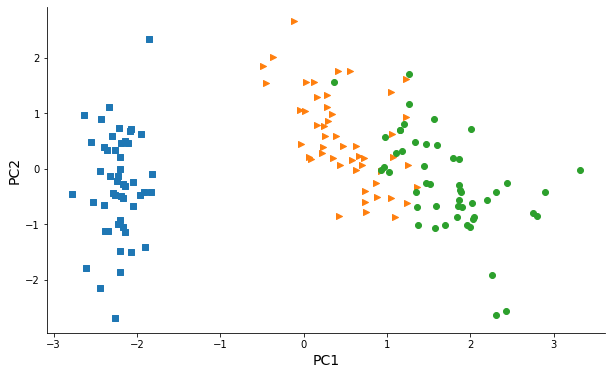

In [ ]:
#graficar
fig,ax = plt.subplots(1,1, figsize=(10,6))
markers = ['s','>','o']
for i,j in zip(np.unique(y), markers):
  ax.scatter(pca_p.iloc[:,0][y==i], pca_p.iloc[:,1][y==i], marker=j)

ax.set_xlabel(pca_p.columns[0], size=14)
ax.set_ylabel(pca_p.columns[1], size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
scal = StandardScaler()
X_scal = scal.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scal)

pca_2 = pd.DataFrame(X_pca, columns=['PC1','PC2'])

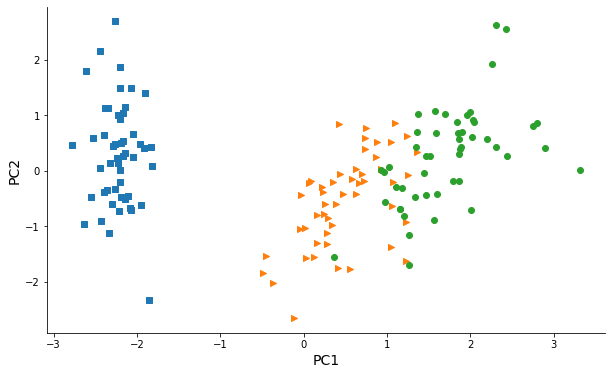

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(10,6))
markers = ['s','>','o']
for i,j in zip(np.unique(y), markers):
  ax.scatter(pca_2.iloc[:,0][y==i], pca_2.iloc[:,1][y==i], marker=j)

ax.set_xlabel(pca_2.columns[0], size=14)
ax.set_ylabel(pca_2.columns[1], size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
pca3 = PCA()

pca3.fit(X_scal)

PCA()

In [ ]:
pca3.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
pca3.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [ ]:
np.cumsum(pca3.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

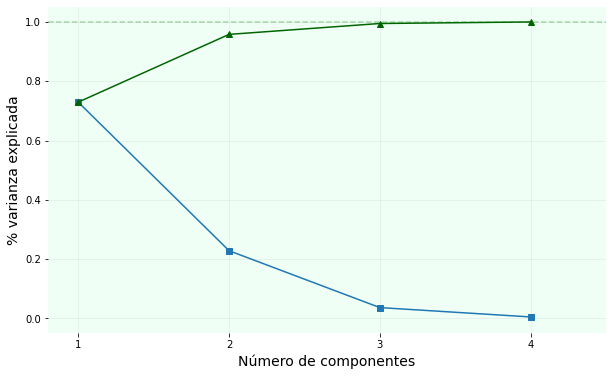

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.set_facecolor('#EFFFF5')
plt.plot(np.arange(1,5,1), pca3.explained_variance_ratio_, marker='s', label='varianza_explicada')
plt.plot(np.arange(1,5,1),np.cumsum(pca3.explained_variance_ratio_), marker='^', color='darkgreen', label='varianza_acumulada')
plt.xlim(0.8,4.5)
plt.ylim(-0.05,1.05)
plt.xticks(ticks=np.arange(1,5,1))
plt.axhline(1, ls='--', color='g', alpha=0.3)
plt.xlabel('Número de componentes', size=14)
plt.ylabel('% varianza explicada', size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.grid(alpha=0.2, axis='both')
plt.show()

In [ ]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [ ]:
sklearn_loadings

array([[ 0.89315091,  0.3620387 ],
       [-0.46168423,  0.88567345],
       [ 0.99487699,  0.02349363],
       [ 0.96821173,  0.06421425]])

In [ ]:
X = pd.DataFrame(X, columns=load_iris()['feature_names'])

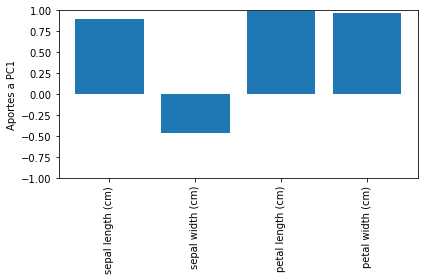

In [ ]:
fig, ax = plt.subplots()
ax.bar(range(4), sklearn_loadings[:, 0], align='center') 
ax.set_ylabel('Aportes a PC1')
ax.set_xticks(range(4))
ax.set_xticklabels(X.columns, rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

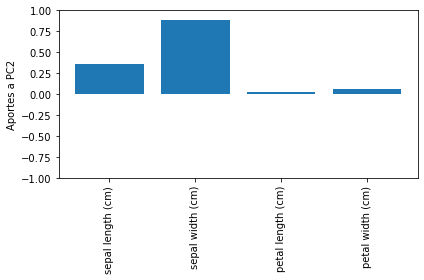

In [ ]:
fig, ax = plt.subplots()
ax.bar(range(4), sklearn_loadings[:, 1], align='center') 
ax.set_ylabel('Aportes a PC2')
ax.set_xticks(range(4))
ax.set_xticklabels(X.columns, rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

#### Pipeline

In [ ]:
s_pca = make_pipeline(StandardScaler(),
              PCA(n_components=2))

In [ ]:
s_pca.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [ ]:
pd.DataFrame(s_pca.fit_transform(X))

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


### t-SNE

#### Dos conceptos:

1. Softmax

$$y(x_i)=\frac{e^{x_i}}{\sum_j e^{x_i}}$$
2. Divergencia Kullback-Leibler

$$D_{KL}(P||K)=\sum_s P(s)\ln{\frac{P(s)}{Q(s)}}$$


#### SNE

1. Calcular la probabilidad de que un dato esté cerca a otro (vecinos), teniendo como medida de distancia la euclidiana y como distribución una Gaussiana:

$$p_{i|j}=\frac{e^{\frac{-||x_i-x_j||^2}{2\sigma^2}}}{\sum_k e^{\frac{-||x_i-x_k||^2}{2\sigma^2}}}$$

2. Calcular la probabilidad de similitud de los datos en baja dimensión 

$$q_{i|j}=\frac{e^{-||y_i-y_j||^2}}{\sum_k e^{-||y_i-y_k||^2}}$$

3. Minimizar la suma de las divergencias de Kullback-Leibler entre $p_{i|j}$ y $q_{i|j}$. La función de costo queda

$$C=\sum_i\sum_jp_{i|j}\ln\bigg(\frac{p_{i|j}}{q_{i|j}}\bigg)$$

SNE permite buenas visualizaciones, pero su función de coste es exigente computacionalmente.

#### t-SNE

El método t-SNE soluciona estos problemas:

1.
$$p_{ij}=\frac{p_{i|j}+p_{j|i}}{2N}$$

2.
$$q_{i|j}=\frac{(1+||y_i-y_j||^2)^{-1}}{\sum_k\sum_l (1+||y_k-y_kl||^2)^{-1}}$$

3.
La función de costo quedaría:

$$C=\sum_{i\neq j}p_{ij}\ln\bigg(\frac{p_{i|j}}{q_{i|j}}\bigg)$$

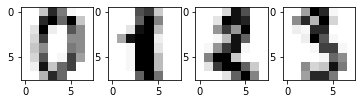

In [ ]:
fig, ax = plt.subplots(1, 4)
for i in range(4):
  ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
digits.images[10]*9

array([[  0.,   0.,   9.,  81., 135.,  99.,   0.,   0.],
       [  0.,   0.,  99., 144.,  72., 126.,  54.,   0.],
       [  0.,  18., 144.,  90.,   0.,  81.,  81.,   0.],
       [  0.,   9., 144.,  36.,   0.,  72.,  72.,   0.],
       [  0.,  36., 144.,  36.,   0.,  72.,  72.,   0.],
       [  0.,   9., 144.,  45.,   9.,  99.,  27.,   0.],
       [  0.,   0., 108., 108.,  90.,  90.,   0.,   0.],
       [  0.,   0.,   9.,  90., 117.,  27.,   0.,   0.]])

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

y_digits = digits.target
X_digits = digits.data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca',
            random_state=124)

X_digits_tsne = tsne.fit_transform(X_digits)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
X_digits_tsne

array([[ -1.1131928,  57.021072 ],
       [ 25.311811 , -19.836061 ],
       [ 17.292994 ,  -9.464723 ],
       ...,
       [  8.463196 , -13.714185 ],
       [-19.421669 ,  25.16468  ],
       [  4.9409285,  -9.680751 ]], dtype=float32)

In [ ]:
im

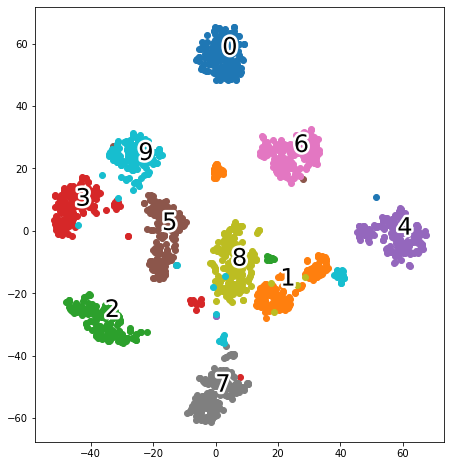

In [ ]:
import matplotlib.patheffects as PathEffects 

def plot_projection(x, colors):

  f = plt.figure(figsize=(8, 8)) 
  ax = plt.subplot(aspect='equal') 
  for i in range(10):
      plt.scatter(x[colors == i, 0],
                  x[colors == i, 1])
  for i in range(10):
    xtext, ytext = np.median(x[colors == i, :], axis=0) 
    txt = ax.text(xtext, ytext, str(i), fontsize=24) 
    txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
plot_projection(X_digits_tsne, y_digits)
plt.show()

In [ ]:
X_digits_tsne.shape

(1797, 2)